# Asignación
**Actividad desarrollada por Marcial Mosqueda**

A continuación se mostrará el programa desarrollado paso a paso y, adicionalmente, encontrará las respuestas a las preguntas del apartado 1 de la asignación

In [1]:
import pandas as pd
import plotly.express as px
from IPython.display import Image

## Sección: Comprobación del archivo y tratamiento de la data
**Nota:** Este apartado pertenece a la segunda parte de la asignación

Debido a que me gusto lo aprendido en clases de crear nuestras propias excepciones, decidí crear 3 especificas para el ejercicio propuesto con la intención de prácticar!!!

In [2]:
class Errors(Exception):
    pass

class ColumnError(Errors):
    pass

class SepsError(Errors):
    pass

class EmptyError(Errors):
    pass


Creamos una función responsable de importar el csv y su validación, en caso de error se genera una excepción

1. Se comprueba el fichero y cantidad de columnas
2. se comprueba que las columnas sean las indicadas por el usuario
3. Se valida que no existan columnas vacias

In [3]:
def create_df(path, columns, seps=[',',]):
    """Crea un dataframe de un archivo csv
    path:str -> path donde se encuentra ubicado el csv
    columns:list -> lista con las columnas en el csv
    sep:list -> lista con los posibles separadores usados en el csv """
    #Validación de los argumentos
    assert(type(path)==str),f'path debe ser un string y fue suministrado un {type(path)}'
    assert(type(columns)==list),f'columns debe ser de tipo lista y fue suministrado un {type(columns)}'
    assert(type(seps)==list),f'seps debe ser de tipo lista y fue suministrado un {type(seps)}'
    assert(all(isinstance(x,str) for x in seps)),'elementos en seps deben ser del tipo string'
    try:
        df = pd.read_csv(path,sep=seps[0]) #Creación del DataFrame
        check = False
        
        # Primera validación: Validación del constructor y pruebas con separadores
        if len(df.columns) == len(columns):
            check = True 
        else:
            for item in seps[1:]:
                df = pd.read_csv(path,sep=item)
                if len(df.columns)==len(columns):
                    check = True
                    break
        
        # Segunda validación: Columnas en el DataFrame y separador
        if not check:
            if len(df.columns)==1:
                raise SepsError
            msg = 'El Dataframe no posee la cantidad de columnas indicadas'
            raise ColumnError 
        
        for col in columns:
            if col not in df.columns:
                msg = f'Columna {col} no se encuentra en el DataFrame'
                raise ColumnError
       
        cols_vals = {col:df[col].isna().values.all() for col in df.columns}
        
        # Tercera validación: Datos en las columnas
        if sum(cols_vals.values()) != 0:
            raise EmptyError

        return df

    except IOError:
        print(f'validar el path suministrado {path}')
    except SepsError:
        print('Validar los separadores indicados del csv') 
    except EmptyError:
        print('Validar DataFrame y/o separadores suministrados\n'+
             'Columnas vacias\n' + f'{cols_vals}')
    except ColumnError:
        print(msg)

Procedemos a crear una función que nos ayude a validar los daros del Dataframe.
Pasos de la función:

* Al trabajar con data numérica se validará solo columnas que no posean valores numéricos
* Se eliminaran las comillas simples o dobles de las celdas que contengan comillas
* Se convertirán los errores y/o NaN en 0 

La función se aplicará al Dataframe a través del método apply()

In [4]:
def check(col):
    if col.dtypes == 'O':
        col = col.str.replace("'",'')
        col = col.str.replace('"','')
        col = pd.to_numeric(col,errors='coerce').fillna(0)
    return col

## Sección: Implementación de la asignación

Declaración de los siguientes parámetros:
    
- Path del archivo
- Columnas
- Posibles separadores

**Nota:** El archivo csv debe estar en el mismo fichero del .py

In [5]:
path = 'Codigo fuente/finanzas2020[1].csv'

columns = ['Enero','Febrero','Marzo','Abril','Mayo','Junio',
    'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

seps = [',',';',':','\t']

Generamos el Dataframe del archivo Finanzas2020 con ayuda de la función creada en el apartado 1

In [6]:
data = create_df(path,columns,seps)
data

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-760,343,265,-624,-390,-796,601,-780,-491,645,-248,714
1,223,491,-397,-123,6,-115,157,-741,-951,267,14,-596
2,-872,-913,558,278,544,-223,607,-113,348,576,-977,195
3,111,-842,730,-761,158,-963,-290,-669,191,130,170,-274
4,919,111,-688,15,395,9,553,297,-302,695,730,-731
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-652,233,-65,431,-593,-72,-140,-159,-581,771,191,313
96,777,-905,-405,110,-444,-978,-285,-346,207,-363,696,-971
97,-380,946,-790,9,-59,-743,-296,321,-767,944,-116,-873
98,244,-44,-271,462,-55,-699,674,-203,-792,-848,263,-378


Validemos el tipo de datos de cada columna 

In [7]:
data.dtypes

Enero         object
Febrero        int64
Marzo          int64
Abril          int64
Mayo           int64
Junio          int64
Julio         object
Agosto         int64
Septiembre    object
Octubre       object
Noviembre     object
Diciembre      int64
dtype: object

Observamos que tenemos varias columnas con un tipo de Objeto, por lo que alguno de sus items son strings.

Para corregir esta situación, haremos uso de la función "check" definida en el apartado anterior.

**Nota:** Recordar que se debe aplicar a través del método apply()

In [8]:
data = data.apply(check)
data.dtypes

Enero           int64
Febrero         int64
Marzo           int64
Abril           int64
Mayo            int64
Junio           int64
Julio           int64
Agosto          int64
Septiembre    float64
Octubre       float64
Noviembre       int64
Diciembre       int64
dtype: object

Como podemos observar las 12 columnas poseen un tipo de datos numérico.

Los meses de Septiembre y Octubre poseen un tipo de dato tipo float64 debido a que contenian errores (NaN) luego de la conversión

Procederemos a hacer una revisión general del DataFrame con describe()

In [9]:
data.describe()

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,115.230000,0.390000,-79.690000,-189.330000,103.040000,-14.770000,76.980000,-87.350000,-109.480000,34.120000,11.570000,-30.440000
std,545.948842,573.923743,585.916595,538.862139,507.166817,560.952596,533.468164,559.822399,545.570288,568.993623,583.819006,568.313424
min,-966.000000,-989.000000,-979.000000,-960.000000,-981.000000,-978.000000,-994.000000,-987.000000,-980.000000,-988.000000,-977.000000,-991.000000
25%,-359.000000,-475.000000,-586.500000,-666.500000,-368.000000,-476.750000,-292.250000,-580.500000,-525.250000,-481.000000,-539.750000,-538.000000
50%,169.500000,-0.500000,-159.000000,-212.500000,151.000000,-50.000000,91.500000,-163.000000,-139.500000,71.500000,44.000000,0.500000
75%,541.750000,442.500000,390.750000,235.750000,539.500000,472.750000,528.250000,367.250000,348.000000,499.750000,445.250000,426.250000
max,990.000000,992.000000,999.000000,897.000000,998.000000,989.000000,926.000000,955.000000,978.000000,995.000000,985.000000,980.000000


Para poder continuar con el análisis, procederemos a incluir dos nuevas filas al DataFrame.

- 'Ahorro': será la suma de todos los valores >0 de cada mes
- 'Gasto': será la suma de todos los valores <0 de cada mes

In [10]:
data.loc['Gasto'] = data[data<0].sum()
data.loc['Ahorro'] = data[data>0].sum()
data.tail(2)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Gasto,-18162.0,-24398.0,-29690.0,-34133.0,-17200.0,-24197.0,-18992.0,-29013.0,-29151.0,-22957.0,-24180.0,-25861.0
Ahorro,29685.0,24437.0,21721.0,15200.0,27504.0,22720.0,26690.0,20278.0,18203.0,26369.0,25337.0,22817.0


Ahora tenemos toda la información ordenada para proceder a responder las preguntas del apratado 1 de la asignación:

1. ¿Qué mes se ha gastado más?

In [11]:
data[data == data.loc['Gasto'].max()].loc['Gasto'].idxmax()

'Mayo'

2. ¿Qué mes se ha ahorrado más?

In [12]:
data[data == data.loc['Ahorro'].max()].loc['Ahorro'].idxmax()

'Enero'

3. ¿Cuál es la media de gastos al año?

In [13]:
'{:+,.2f}'.format(data.loc['Gasto'].mean())

'-24,827.83'

4. ¿Cuál ha sido el gasto total a lo largo del año?

In [14]:
'{:+,.2f}'.format(data.loc['Gasto'].sum())

'-297,934.00'

5. ¿Cuáles han sido los ingresos totales a lo largo del año?

In [15]:
'{:,.2f}'.format(data.loc['Ahorro'].sum())

'280,961.00'

6. Gráfica de los ingresos a lo largo del año

Separo la data de Gastos y Ahorro por mes en un DataFrame independiente data2

In [16]:
data2 = data.loc[['Ahorro','Gasto']]
data2

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Ahorro,29685.0,24437.0,21721.0,15200.0,27504.0,22720.0,26690.0,20278.0,18203.0,26369.0,25337.0,22817.0
Gasto,-18162.0,-24398.0,-29690.0,-34133.0,-17200.0,-24197.0,-18992.0,-29013.0,-29151.0,-22957.0,-24180.0,-25861.0


Creamos la gráfica

In [17]:
fig = px.bar(data2.transpose(),opacity=0.7,title='Gasto y Ahorro por mes',text_auto=True)
fig.layout.xaxis.title.text = 'Mes'
fig.layout.yaxis.title.text = 'Valor'

Vamos a pasar la gráfica a una imagen e imprimirla en el notebook

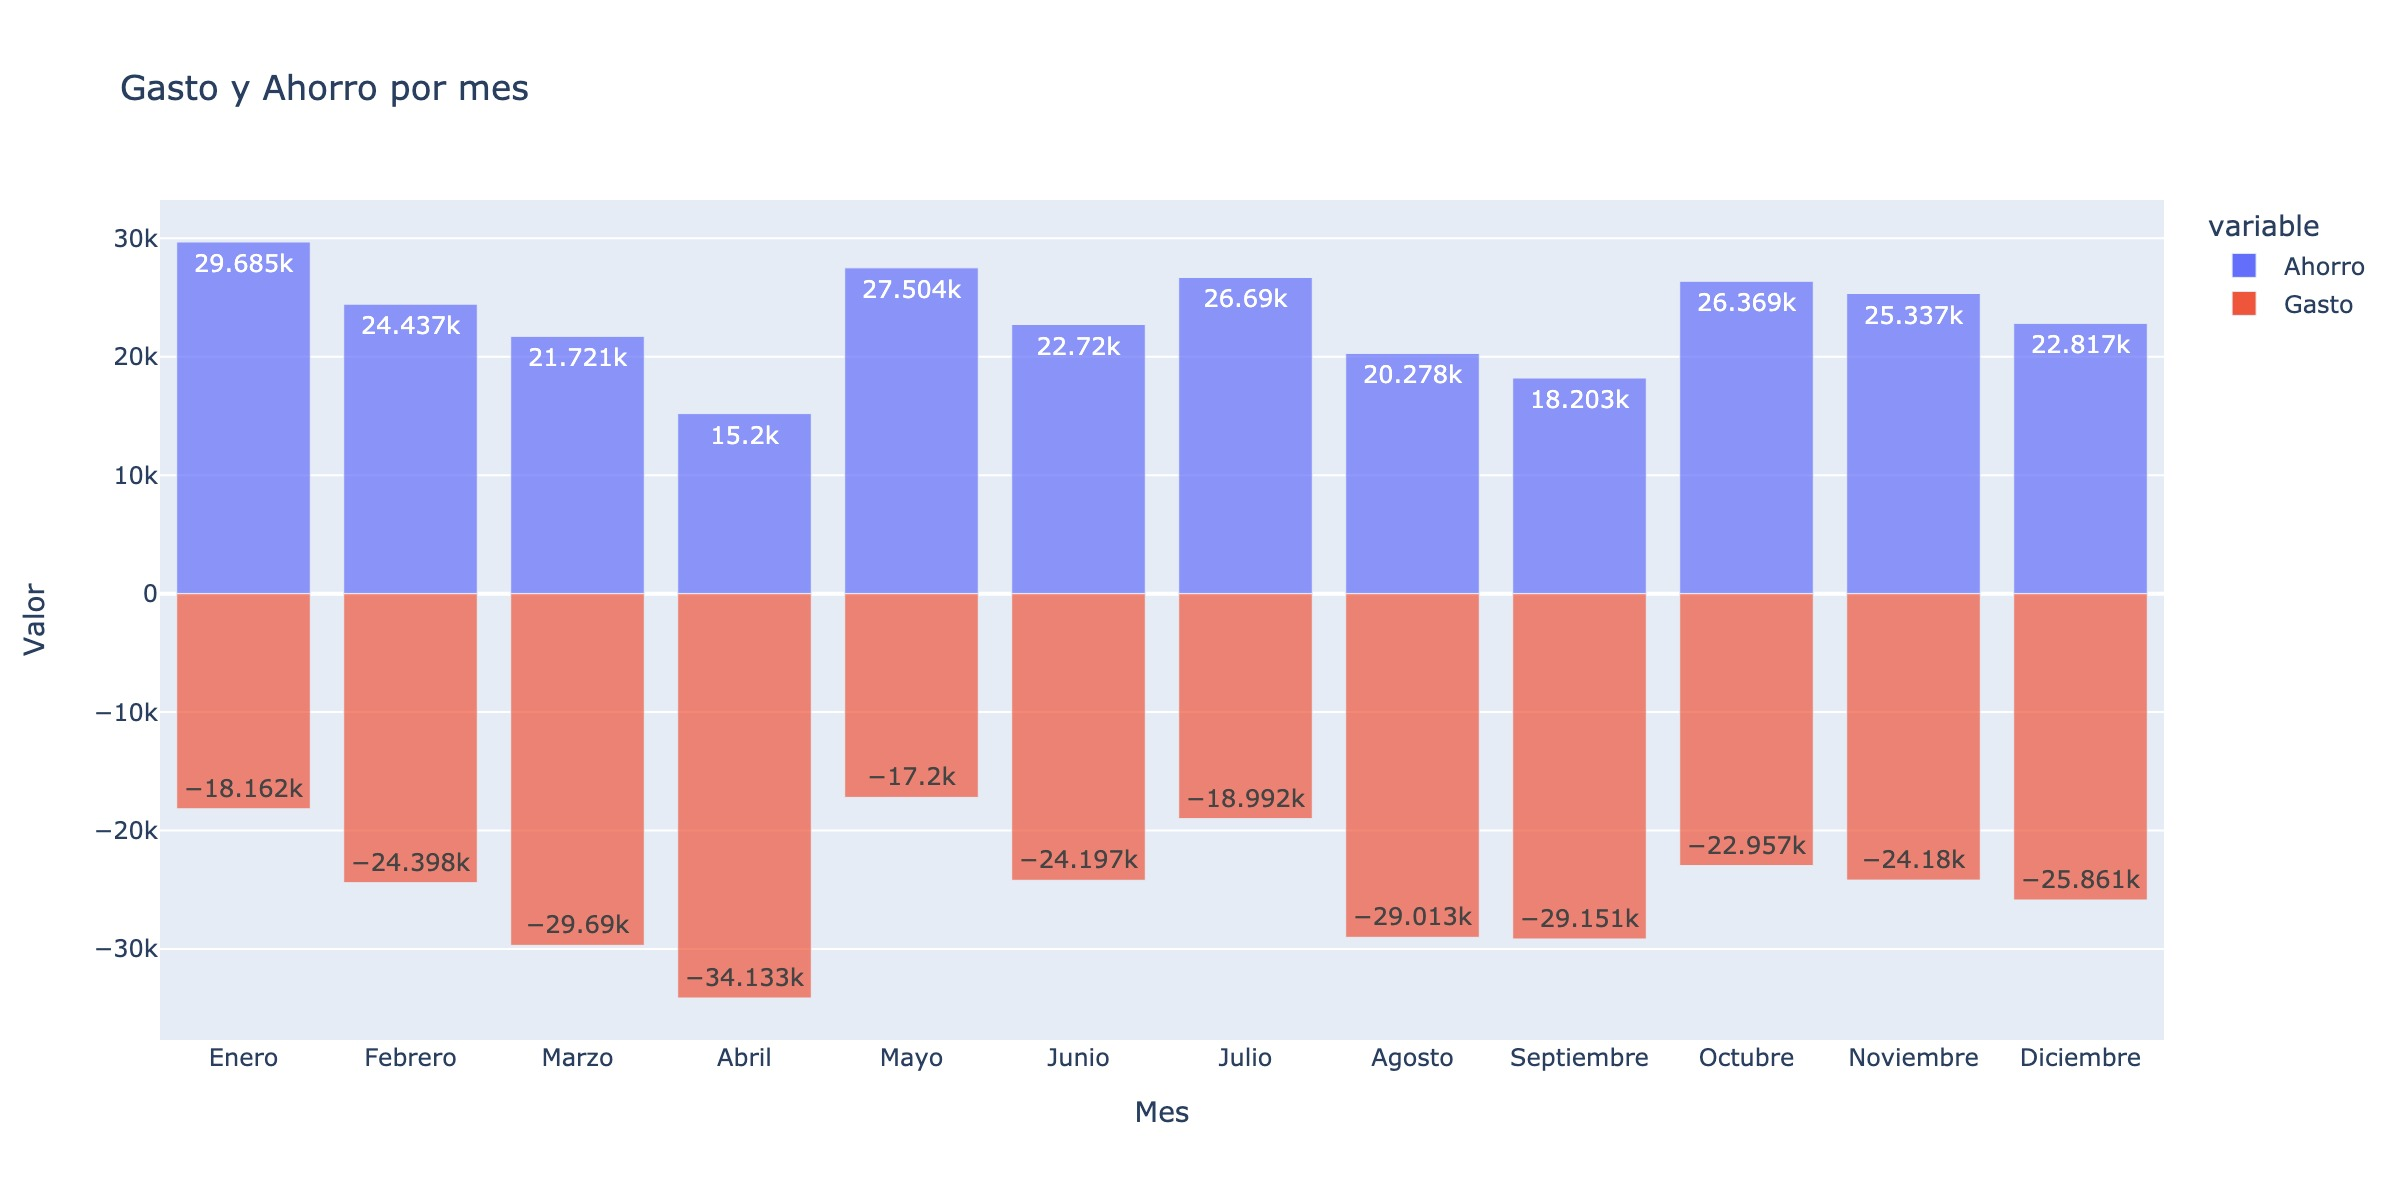

In [18]:
img = fig.to_image(format='jpeg',width=1200,height=600,scale=2)
Image(img)

In [23]:
data.Enero.dtypes in ('float64','int64')

True

In [24]:
data[data<0]

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-760.0,NaN,NaN,-624.0,-390.0,-796.0,NaN,-780.0,-491.0,NaN,-248.0,NaN
1,NaN,NaN,-397.0,-123.0,NaN,-115.0,NaN,-741.0,-951.0,NaN,NaN,-596.0
2,-872.0,-913.0,NaN,NaN,NaN,-223.0,NaN,-113.0,NaN,NaN,-977.0,NaN
3,NaN,-842.0,NaN,-761.0,NaN,-963.0,-290.0,-669.0,NaN,NaN,NaN,-274.0
4,NaN,NaN,-688.0,NaN,NaN,NaN,NaN,NaN,-302.0,NaN,NaN,-731.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97,-380.0,NaN,-790.0,NaN,-59.0,-743.0,-296.0,NaN,-767.0,NaN,-116.0,-873.0
98,NaN,-44.0,-271.0,NaN,-55.0,-699.0,NaN,-203.0,-792.0,-848.0,NaN,-378.0
99,NaN,-221.0,NaN,-960.0,-303.0,-384.0,NaN,-11.0,-456.0,NaN,NaN,NaN
Gasto,-18162.0,-24398.0,-29690.0,-34133.0,-17200.0,-24197.0,-18992.0,-29013.0,-29151.0,-22957.0,-24180.0,-25861.0


In [29]:
data

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-760.0,343.0,265.0,-624.0,-390.0,-796.0,601.0,-780.0,-491.0,645.0,-248.0,714.0
1,223.0,491.0,-397.0,-123.0,6.0,-115.0,157.0,-741.0,-951.0,267.0,14.0,-596.0
2,-872.0,-913.0,558.0,278.0,544.0,-223.0,607.0,-113.0,348.0,576.0,-977.0,195.0
3,111.0,-842.0,730.0,-761.0,158.0,-963.0,-290.0,-669.0,191.0,130.0,170.0,-274.0
4,919.0,111.0,-688.0,15.0,395.0,9.0,553.0,297.0,-302.0,695.0,730.0,-731.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97,-380.0,946.0,-790.0,9.0,-59.0,-743.0,-296.0,321.0,-767.0,944.0,-116.0,-873.0
98,244.0,-44.0,-271.0,462.0,-55.0,-699.0,674.0,-203.0,-792.0,-848.0,263.0,-378.0
99,126.0,-221.0,290.0,-960.0,-303.0,-384.0,506.0,-11.0,-456.0,268.0,630.0,271.0
Gasto,-18162.0,-24398.0,-29690.0,-34133.0,-17200.0,-24197.0,-18992.0,-29013.0,-29151.0,-22957.0,-24180.0,-25861.0


In [30]:
data2

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Ahorro,29685.0,24437.0,21721.0,15200.0,27504.0,22720.0,26690.0,20278.0,18203.0,26369.0,25337.0,22817.0
Gasto,-18162.0,-24398.0,-29690.0,-34133.0,-17200.0,-24197.0,-18992.0,-29013.0,-29151.0,-22957.0,-24180.0,-25861.0
